INTRODUÇÃO:


Será explorados dados do arquivo obesity.csv, disponibilizado pelo www.kaggle.com, a base de dados pode ser acessado através deste link: https://www.kaggle.com/datasets/muhramasaputra/obesity-based-on-eating-habits-and-physical-cond.
Os dados estão em formato CSV e contém informações sobre o número de obesidade com base em hábitos alimentares e condição física, estamos interessado em explicar a última coluna "Nobeyesdad" quê indica que pessoas com (NObeyesdad = 0) seja pessoas não obesa e (NObeyesdad = 1) pessoas obesas ou seja queremos entender o motivo ao qual leva as pessoas terem obesidade baseado nos seus atos alimentares, atividades fisicas e etc.

Descrição do dados logo abaixo: 

    O gênero é 1 se o entrevistado for do sexo masculino e 0 se o entrevistado for do sexo feminino.
    Idade é a idade do entrevistado em anos.
    family_history_with_overweight é 1 se um entrevistado tem um membro da família que está ou estava acima do peso, 0 se não.
    FAVC é 1 se um entrevistado come alimentos com alto teor calórico com frequência, 0 se não.
    O FCVC é 1 se o entrevistado costuma comer vegetais nas refeições, 0 caso contrário.
    O NCP representa quantas refeições principais um entrevistado faz diariamente (0 para 1-2 refeições, 1 para 3 refeições e 2 para mais de 3 refeições).
    CAEC representa a quantidade de comida que um entrevistado ingere entre as refeições em uma escala de 0 a 3.
    SMOKE é 1 se o entrevistado fuma, 0 se não.
    CH2O representa quanta água um entrevistado bebe em uma escala de 0 a 2.
    O SCC é 1 se um entrevistado monitora sua ingestão calórica, 0 caso contrário.
    FAF representa quanta atividade física um entrevistado faz em uma escala de 0 a 3.
    TUE representa quanto tempo um entrevistado passa olhando para dispositivos com telas em uma escala de 0 a 2.
    CALC representa a frequência com que um entrevistado bebe álcool em uma escala de 0 a 3.
    Automóvel , Bicicleta , Moto , Transporte Público e Caminhada indicam o principal meio de transporte do entrevistado. Seu principal meio de transporte é indicado por 1 e as outras colunas conterão 0.
    NObeyesdad é 1 se o paciente for obeso e 0 se não for.


IMPORTANDO BIBLIOTECAS QUE SERÃO UTILIZADAS AO LONGO DA ANÁLISE

In [5]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 


IMPORTANDO O ARQUIVO

In [6]:
df_dados = pd.read_csv('obesity_dados_antes_da_consulta.csv')
df_dados

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,0,0,0,1,0,0
1,0,21.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,0,0,0,1,0,0
2,1,23.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,0,0,0,1,0,0
3,1,27.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,0,0,0,0,1,0
4,1,22.000000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,0,0,1,0,1
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,0,0,1,0,1
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,0,0,1,0,1
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,0,0,1,0,1


Quantidade de colunas e linhas

In [7]:
qtd_linhas, qtd_colunas = df_dados.shape
print(f'Quantidade de linhas {qtd_linhas}')
print(f'Quantidade de colunas {qtd_colunas}')

Quantidade de linhas 2111
Quantidade de colunas 19


A quantidade de linhas e colunas de pessoas definidas como obesa

In [8]:
qnt_linhas_obeso,qnt_coluna_obeso = df_dados[df_dados['NObeyesdad'] == 1].shape
print(f'Quantidade de linhas que são obesos {qnt_linhas_obeso}')
print(f'Quantidade de colunas que são obesos {qnt_coluna_obeso}')

Quantidade de linhas que são obesos 972
Quantidade de colunas que são obesos 19


A quantidade de linhas e colunas de pessoas definidas como não obesa

In [9]:
no_obeso_linha, no_obeso_coluna = df_dados[df_dados['NObeyesdad']==0].shape
print(f'Quantida de linha de pessoas obesas {no_obeso_linha}\nQuantidade de colunas de pessoas obesas {no_obeso_coluna}')

Quantida de linha de pessoas obesas 1139
Quantidade de colunas de pessoas obesas 19


Porcetagem de pessoas que sãos obesos e as que não sãos.

In [10]:
print(f'Porcetagem de obesos {round(qnt_linhas_obeso / qtd_linhas * 100,2)}%')
print(f'Porcetagem de nao obeso {round(no_obeso_linha / qtd_linhas * 100 , 2)}%')
df_dados['NObeyesdad'].value_counts(normalize=True)

Porcetagem de obesos 46.04%
Porcetagem de nao obeso 53.96%


NObeyesdad
0    0.539555
1    0.460445
Name: proportion, dtype: float64

buscando informações dos tipos de dados, se há número nulos ou não, se todas as linhas estão preenchida corretamente e as descrições do meu dataframe.


In [11]:
df_dados.info()
df_dados.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   int64  
 3   FAVC                            2111 non-null   int64  
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   int64  
 7   SMOKE                           2111 non-null   int64  
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   int64  
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [12]:
df_dados.select_dtypes(float).describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.0,19.947192,22.777890,26.000000,61.0
FCVC,2111.0,2.419043,0.533927,1.0,2.000000,2.385502,3.000000,3.0
NCP,2111.0,2.685628,0.778039,1.0,2.658738,3.000000,3.000000,4.0
CH2O,2111.0,2.008011,0.612953,1.0,1.584812,2.000000,2.477420,3.0
FAF,2111.0,1.010298,0.850592,0.0,0.124505,1.000000,1.666678,3.0
TUE,2111.0,0.657866,0.608927,0.0,0.000000,0.625350,1.000000,2.0


In [13]:
df_dados.select_dtypes(int).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,2111.0,0.505921,0.500083,0.0,0.0,1.0,1.0,1.0
family_history_with_overweight,2111.0,0.817622,0.386247,0.0,1.0,1.0,1.0,1.0
FAVC,2111.0,0.883941,0.320371,0.0,1.0,1.0,1.0,1.0
CAEC,2111.0,1.140692,0.468543,0.0,1.0,1.0,1.0,3.0
SMOKE,2111.0,0.020843,0.142893,0.0,0.0,0.0,0.0,1.0
SCC,2111.0,0.045476,0.208395,0.0,0.0,0.0,0.0,1.0
CALC,2111.0,0.731407,0.515498,0.0,0.0,1.0,1.0,3.0
Automobile,2111.0,0.216485,0.411946,0.0,0.0,0.0,0.0,1.0
Bike,2111.0,0.003316,0.057502,0.0,0.0,0.0,0.0,1.0
Motorbike,2111.0,0.005211,0.072015,0.0,0.0,0.0,0.0,1.0


In [14]:
df_dados.isnull().sum()

Gender                            0
Age                               0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
Automobile                        0
Bike                              0
Motorbike                         0
Public_Transportation             0
Walking                           0
NObeyesdad                        0
dtype: int64

In [15]:
df_dados.drop(labels='family_history_with_overweight', axis= 1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,2111.0,0.505921,0.500083,0.0,0.000000,1.000000,1.000000,1.0
Age,2111.0,24.312600,6.345968,14.0,19.947192,22.777890,26.000000,61.0
FAVC,2111.0,0.883941,0.320371,0.0,1.000000,1.000000,1.000000,1.0
FCVC,2111.0,2.419043,0.533927,1.0,2.000000,2.385502,3.000000,3.0
NCP,2111.0,2.685628,0.778039,1.0,2.658738,3.000000,3.000000,4.0
CAEC,2111.0,1.140692,0.468543,0.0,1.000000,1.000000,1.000000,3.0
SMOKE,2111.0,0.020843,0.142893,0.0,0.000000,0.000000,0.000000,1.0
CH2O,2111.0,2.008011,0.612953,1.0,1.584812,2.000000,2.477420,3.0
SCC,2111.0,0.045476,0.208395,0.0,0.000000,0.000000,0.000000,1.0
FAF,2111.0,1.010298,0.850592,0.0,0.124505,1.000000,1.666678,3.0


2.LIMPEZA DE DADOS

Etapa de transformação e limpeza de dados.

transformando alguns tipo de dados que estavam em float64 em int64, e a coluna gênero em object.

In [16]:
for coluna in ['Age','FAF','TUE','NCP','FCVC','CH2O']:
    df_dados[coluna] = df_dados[coluna].astype('int64')
df_dados['Gender'] = df_dados['Gender'].astype(str)
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Gender                          2111 non-null   object
 1   Age                             2111 non-null   int64 
 2   family_history_with_overweight  2111 non-null   int64 
 3   FAVC                            2111 non-null   int64 
 4   FCVC                            2111 non-null   int64 
 5   NCP                             2111 non-null   int64 
 6   CAEC                            2111 non-null   int64 
 7   SMOKE                           2111 non-null   int64 
 8   CH2O                            2111 non-null   int64 
 9   SCC                             2111 non-null   int64 
 10  FAF                             2111 non-null   int64 
 11  TUE                             2111 non-null   int64 
 12  CALC                            2111 non-null   

Substituindo nome de algumas colunas, excluindo coluna desnecessária que não será necessária pra nossa base de dados e trocando valores de uma coluna por outros.

In [17]:
df_dados['Gender'] = df_dados['Gender'].replace(to_replace=['1','0'], value=['Masculino','Feminino'], regex=True)

In [18]:
df_dados.drop(columns=['family_history_with_overweight'], axis=1, inplace=True)


In [19]:
df_dados = \
    df_dados.rename(columns=
                    {'Age':'Idade','Gender':'Gênero','Automobile':'Automovél',
                                    'Bike':'Bicicleta','Motorbike':'Motocicleta',
                                    'Public_Transportation':'Transporte_Público','Walking':'Caminhada',
                                    'NObeyesdad':'Obesidade'
                            })

3.Análise e visualização dos dados

In [20]:
df_dados

,Gênero,Idade,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automovél,Bicicleta,Motocicleta,Transporte_Público,Caminhada,Obesidade
0,Feminino,21,0,2,3,1,0,2,0,0,1,0,0,0,0,1,0,0
1,Feminino,21,0,3,3,1,1,3,1,3,0,1,0,0,0,1,0,0
2,Masculino,23,0,2,3,1,0,2,0,2,1,2,0,0,0,1,0,0
3,Masculino,27,0,3,3,1,0,2,0,2,0,2,0,0,0,0,1,0
4,Masculino,22,0,2,1,1,0,2,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Feminino,20,1,3,3,1,0,1,0,1,0,1,0,0,0,1,0,1
2107,Feminino,21,1,3,3,1,0,2,0,1,0,1,0,0,0,1,0,1
2108,Feminino,22,1,3,3,1,0,2,0,1,0,1,0,0,0,1,0,1
2109,Feminino,24,1,3,3,1,0,2,0,1,0,1,0,0,0,1,0,1


3. Etapa de gráficos para análise.

In [21]:
sns.set_style('darkgrid')
df_dados_backup = df_dados
df_obeso = df_dados_backup[df_dados_backup['Obesidade'] == 1]
df_obeso.groupby(['NCP','Bicicleta','Caminhada'])['Obesidade'].value_counts()

NCP  Bicicleta  Caminhada  Obesidade
1    0          0          1            133
2    0          0          1            149
3    0          0          1            685
                1          1              3
     1          0          1              1
4    0          0          1              1
Name: count, dtype: int64

Representação gráfica de quantas pessoas que são obesas, faz refeições diarias, 1 = uma ou duas refeições por dia, 2= três reifeições por dias, 3 = mais de três refeições por dia

Text(0.5, 1.0, 'REFEIÇÕES DIARIAS')

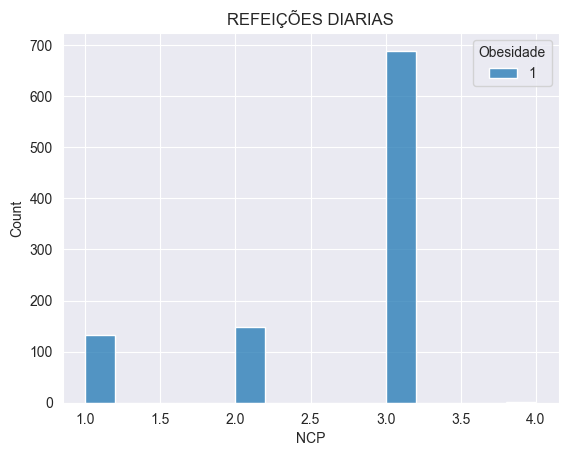

In [22]:
sns.histplot(data=df_obeso, x='NCP', hue='Obesidade', multiple='stack')
plt.title('REFEIÇÕES DIARIAS')

Representação gráfica quê mostra quantas pessoas obesas pratica esporte ou exercicios ligada com a quantidade de refeições que digere por dia.

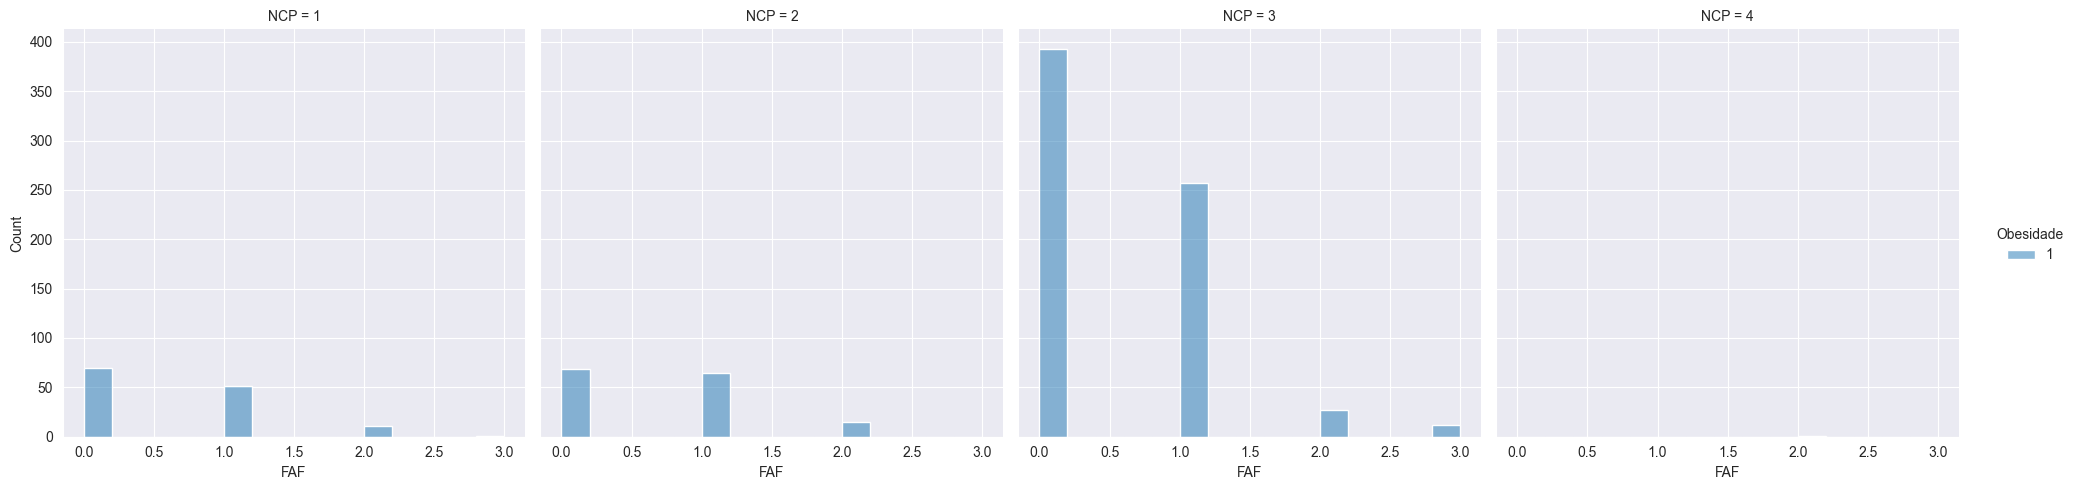

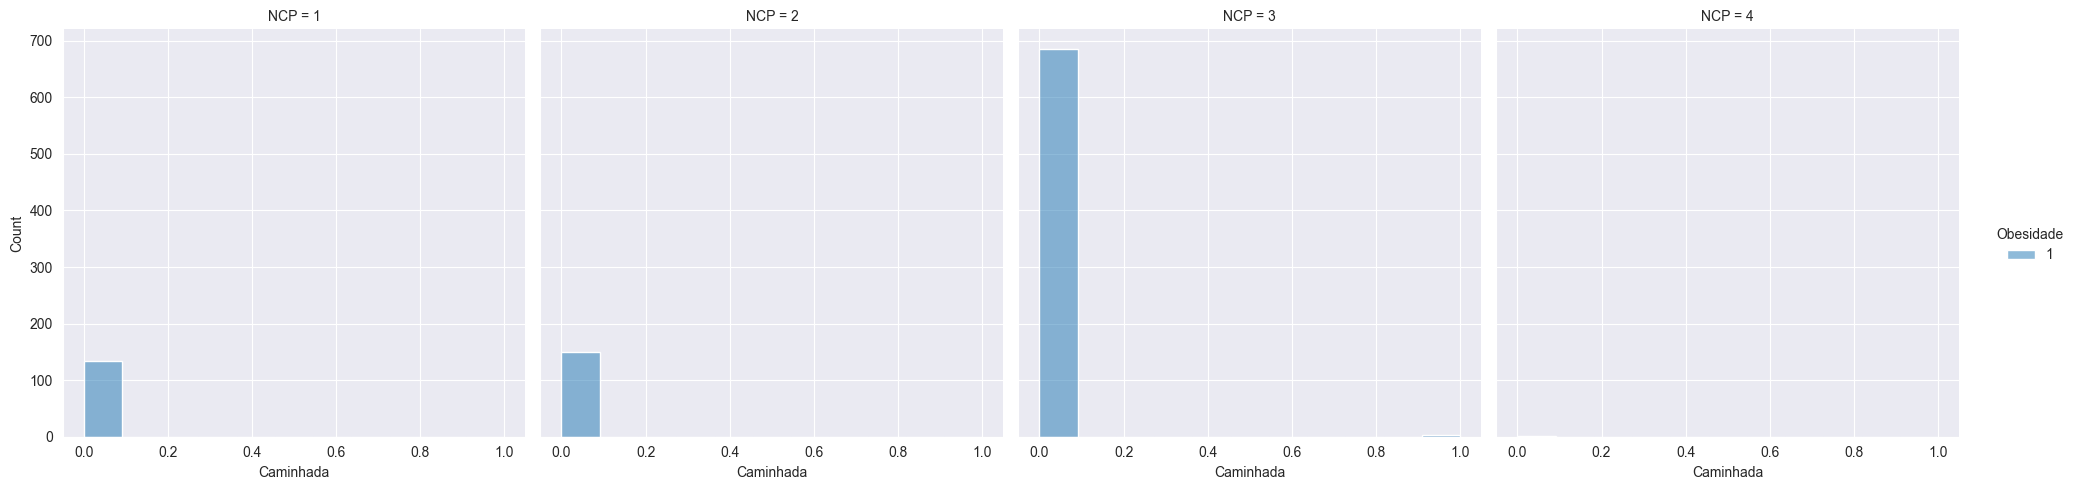

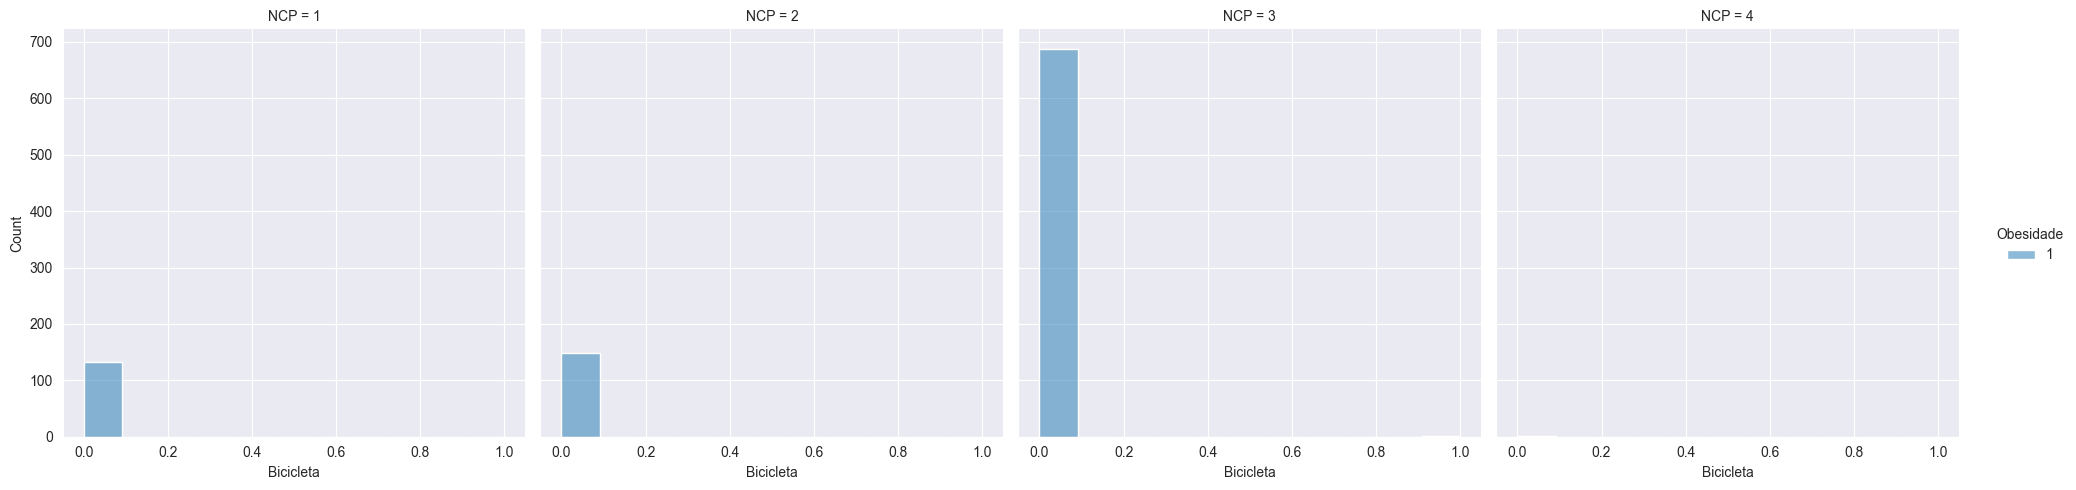

In [23]:
pratica_exercicios = ['FAF','Caminhada','Bicicleta']
for coluna in pratica_exercicios:
    sns.displot(data=df_obeso, x=coluna, hue='Obesidade', col='NCP')

Representação gráfica de quantas pessoas que não são obesas, faz refeições diarias, 1 = uma ou duas refeições por dia, 2= três reifeições por dias, 3 = mais de três refeições por dia

<Axes: xlabel='NCP', ylabel='Count'>

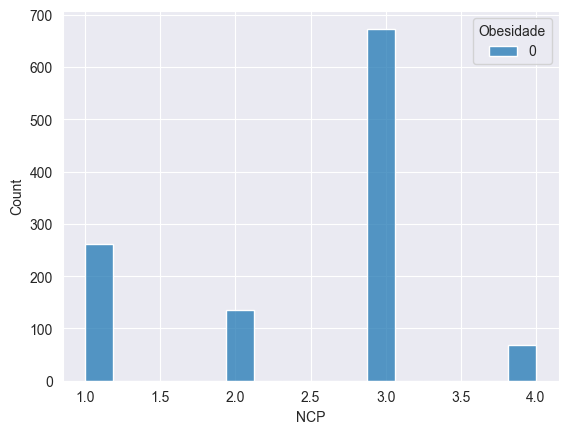

In [24]:
df_não_obeso = df_dados_backup[df_dados_backup['Obesidade'] == 0]
sns.histplot(data=df_não_obeso, x='NCP', hue='Obesidade', multiple='stack')

Representação gráfica quê mostra quantas pessoas não obesas pratica esporte ou exercicios ligada com a quantidade de refeições que digere por dia.

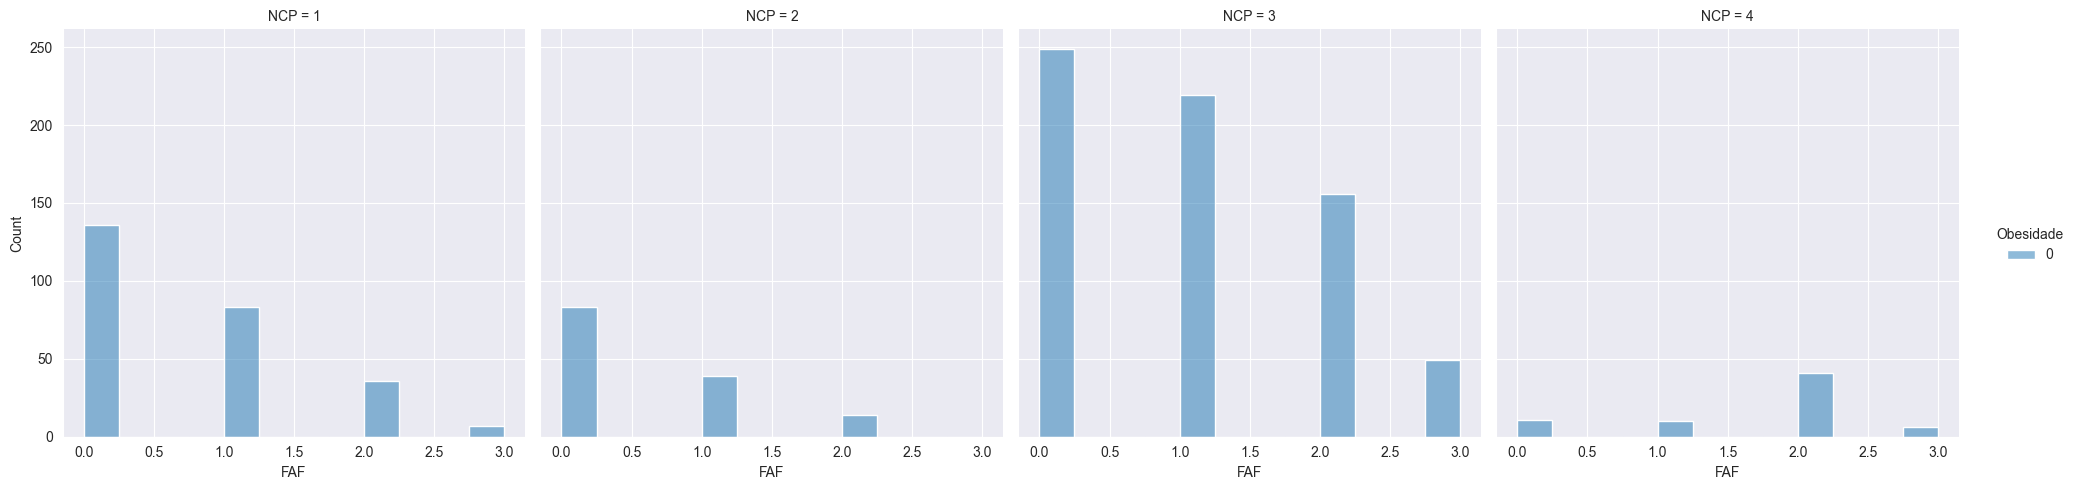

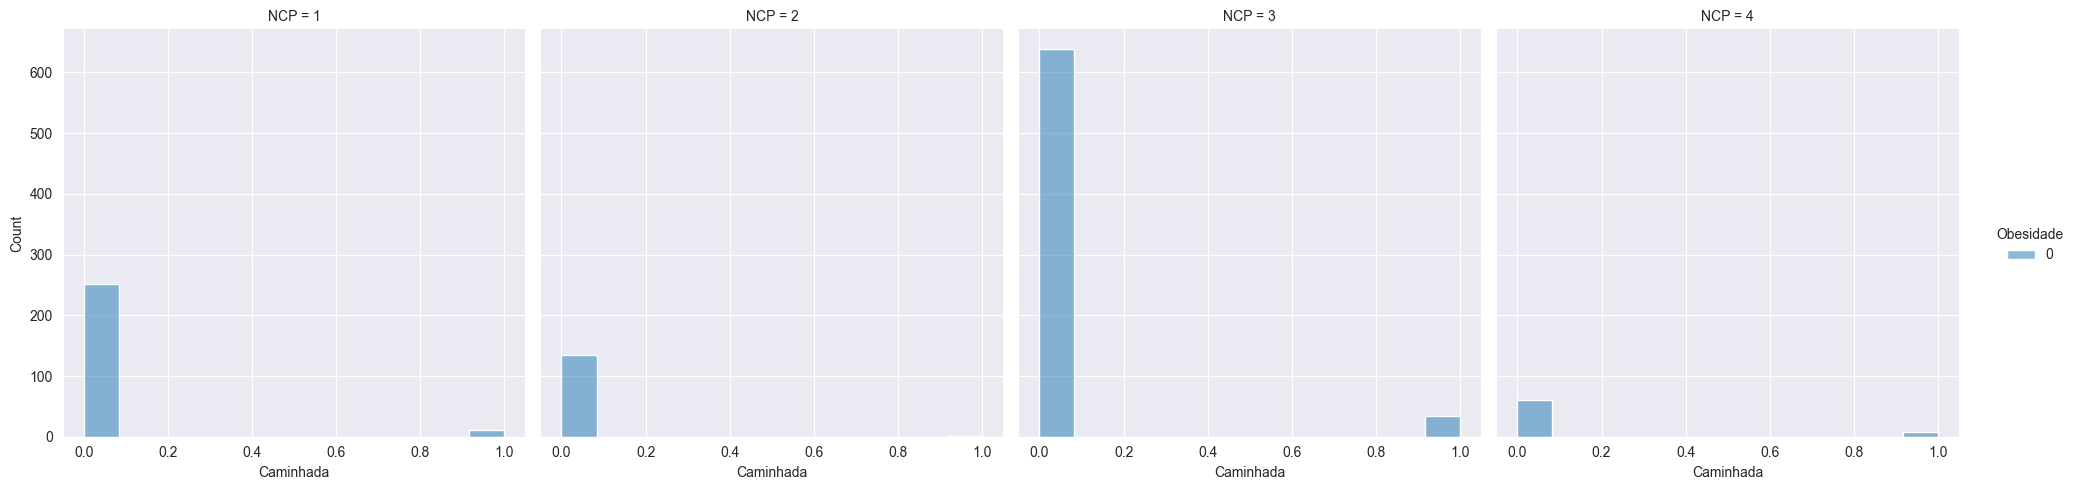

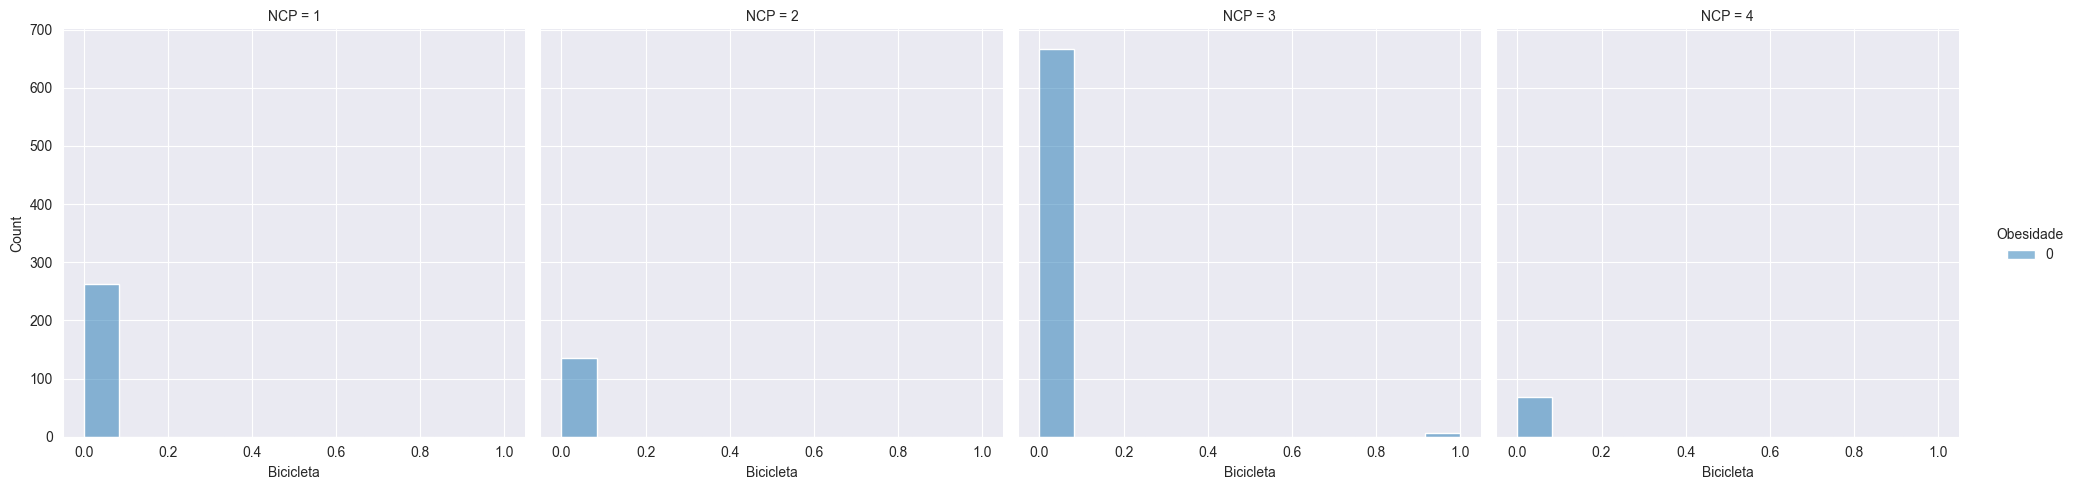

In [25]:
for coluna_no_obeso in pratica_exercicios:
    sns.displot(data=df_não_obeso, x=coluna_no_obeso, hue='Obesidade', col='NCP')

Representação gráfica que mostra a média de idade das pessoas que são obesa

25.0

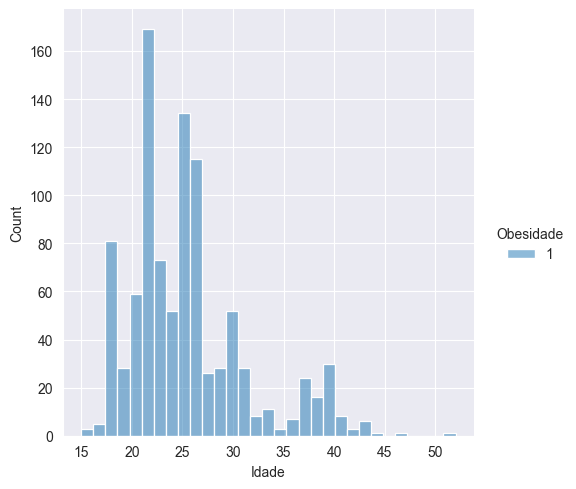

In [26]:
sns.displot(data=df_obeso, x='Idade', hue='Obesidade')
df_obeso['Idade'].median()

21.0

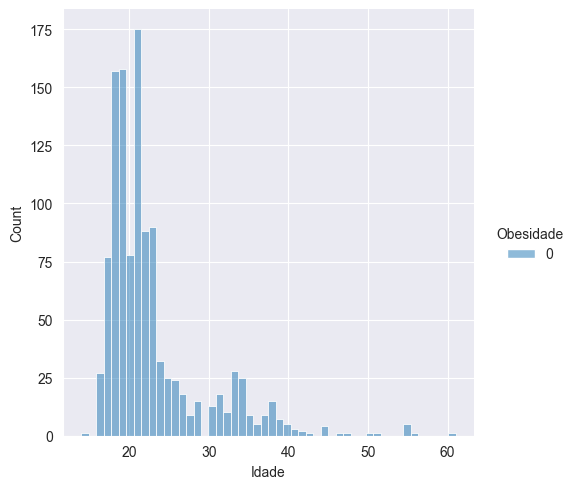

In [27]:
sns.displot(data=df_não_obeso, x='Idade', hue='Obesidade')
df_não_obeso['Idade'].median()

<Axes: xlabel='Gênero', ylabel='Count'>

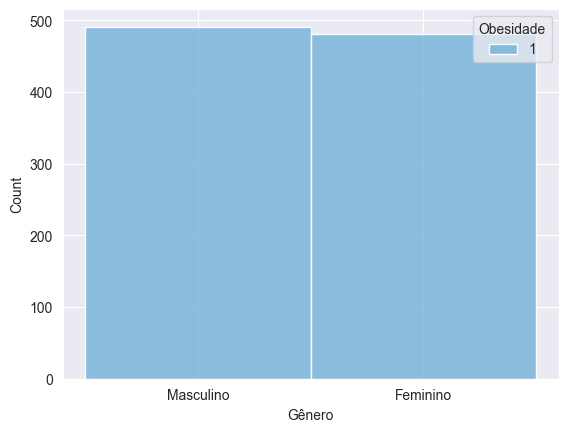

In [45]:
sns.histplot(data=df_obeso, x='Gênero', hue='Obesidade', multiple='stack', palette='Blues')



<Axes: xlabel='Gênero', ylabel='Count'>

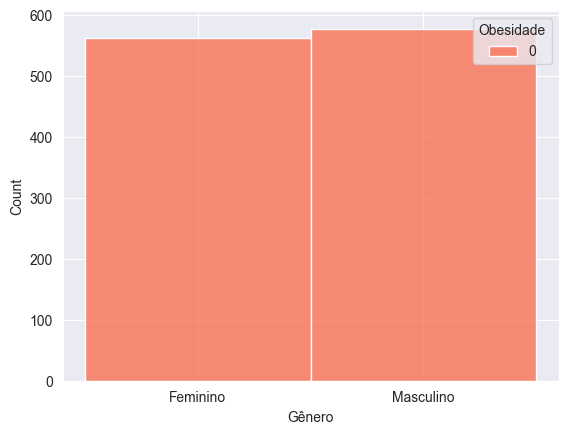

In [42]:
sns.histplot(data=df_não_obeso, x='Gênero', hue='Obesidade',multiple='stack', palette='Reds')

In [29]:
df_dados.to_csv('obesidade.csv', index=False)

4. Resumo dos insights gerados:

Chegamos então a algumas conclusões que podem elucidar o que leva a pessoa ter obesidade, alguns desses atributos foram desconsiderados para análise como a coluna 'family_history_with_overweight', Exploramos todas as variáveis explicativas tanto de forma independente como correlacionadas umas com as outras, tendo como principal referência de comparação a variável resposta da coluna obesidade que se trata do atributo de interesse e descreve a obesidade ou não obesidade dos clientes.

4.1 Com está análise conseguimos chegar a conclusão de quê a quantidade de refeições diarias e pouca prática de exercicios sejam elas caminhadas, andar de bicicleta etc, leva a pouca perda de calorias. Podemos ver também que a maior parte dos clientes obesos possui a média de idade entre 20 a 25 anos, maior do que os quê média dos não são obesos e a maior parte deles são do gênero masculino. Uma solução viavél seria mais praticas de exercicios e dando incentivo para que as pessoas possam praticar atividades físicas e ter uma alimentação saudavél.
